In [11]:
import time
from selenium import webdriver
import csv 
driver = webdriver.Chrome(r"C:\Users\Ahmed-wafa\Desktop\AI pro\Semester 1\Other\Data Representation\Driver\chromedriver.exe")

In [12]:
driver.get('https://wuzzuf.net/jobs/egypt')

In [13]:
txt_search =  driver.find_element_by_css_selector("input.search-bar-input")
txt_search.send_keys("Machine Learning Engineer")

In [14]:
btn_search =  driver.find_element_by_css_selector("button[class='btn btn-primary search-btn']")
btn_search.click()

In [91]:
lst_job_links = []

In [93]:
flag = True
is_first_page = True
while flag:
    a_job_link =  driver.find_elements_by_xpath("//*[@id='app']/div/div[2]/div/div/div[2]/div/div/div/h2/a")
    for i in a_job_link:
        lst_job_links.append(i.get_attribute("href"))
        print(i.get_attribute("href"))
    time.sleep(2)
    lst_next_prev = driver.find_elements_by_css_selector("button[class='css-zye1os ezfki8j0']")
    lst_next_prev[-1].click()
    time.sleep(2)
    if is_first_page == True:
        is_first_page = False
        continue
    if len(lst_next_prev) < 2:
        flag = False
        print("we finished")

https://wuzzuf.net/jobs/p/tSVB0ppzOlQF-Software-Project-Manager-Caelum-Egypt-Giza-Egypt?o=31&l=sp&t=sj&a=Machine%20Learning%20Engineer|search-v3|hpb
https://wuzzuf.net/jobs/p/kwyrqr9YCyWG-Fabrication-Engineer-Power-House-Egypt-Giza-Egypt?o=32&l=sp&t=sj&a=Machine%20Learning%20Engineer|search-v3|hpb
https://wuzzuf.net/jobs/p/kpOggxeUMfHw-Sr-Data-Visualization-And-Support-Engineer-e-finance-Giza-Egypt?o=33&l=sp&t=sj&a=Machine%20Learning%20Engineer|search-v3|hpb
https://wuzzuf.net/jobs/p/fZ0FfjebEutp-Senior-Scrum-Master-RDI-Giza-Egypt?o=34&l=sp&t=sj&a=Machine%20Learning%20Engineer|search-v3|hpb
https://wuzzuf.net/jobs/p/KO6nnulkBKH8-IT-Digital-Solutions-Consultant-Section-Head-Raya-Customer-Experience-Giza-Egypt?o=35&l=sp&t=sj&a=Machine%20Learning%20Engineer|search-v3|hpb
https://wuzzuf.net/jobs/p/8BhrFBUaaldb-Senior-Software-Developer-Focusing-on-PHP-TMentors-Cairo-Egypt?o=36&l=sp&t=sj&a=Machine%20Learning%20Engineer|search-v3|hpb
https://wuzzuf.net/jobs/p/D4VPAQTuFGuE-Software-Engineer--

In [99]:
all_skills_for_the_job = []

In [100]:
for link in lst_job_links:
    driver.get(link)
    Skills = driver.find_element_by_css_selector("div[class='css-s2o0yh']").find_elements_by_class_name("css-158icaa")
    for i in Skills:
        all_skills_for_the_job.append(i.text)

In [102]:
len(all_skills_for_the_job)

677

In [144]:
import pandas as pd
import seaborn as sns
sns.set_style("dark")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [126]:
df = pd.DataFrame(all_skills_for_the_job, columns=["skills"])

In [127]:
df.head()

,skills
0,Computer Science
1,Agile
2,Engineering
3,Information Technology (IT)
4,Management


In [147]:
df.to_csv("SkillsForML.csv",index= False)

In [136]:
df_plotting = pd.DataFrame(df.groupby("skills").size().sort_values(ascending =False).head(20))

In [142]:
df_plotting = df_plotting.reset_index()

<AxesSubplot:xlabel='0', ylabel='skills'>

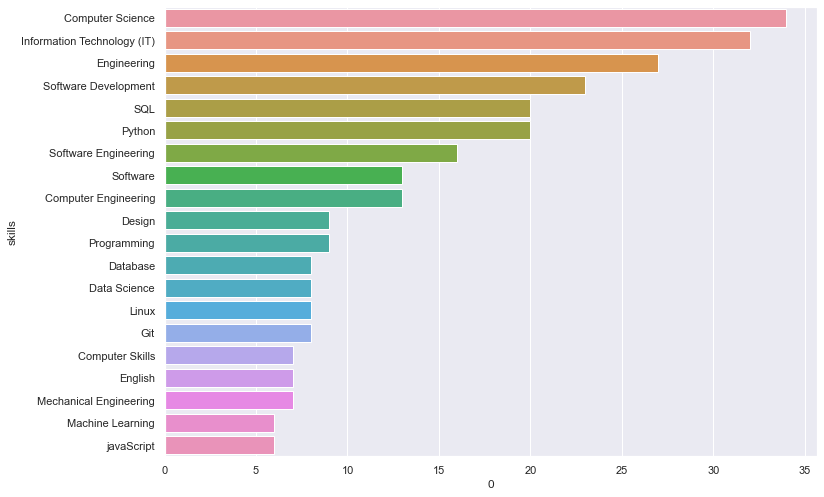

In [145]:
sns.barplot(data=df_plotting, y="skills", x = 0)